In [1]:
# manpulation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
#from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()
#handle person_age
#handle person_income
#handle person_emp_length

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df=df[df['person_age'] <= 80]       

In [6]:
df['person_emp_length'].value_counts()

person_emp_length
0.0      4105
2.0      3847
3.0      3456
5.0      2946
1.0      2914
4.0      2872
6.0      2666
7.0      2195
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      574
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [7]:
df[df['person_emp_length']>=123.0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [8]:
df=df[df['person_emp_length']< 123.0]

In [9]:
df['person_emp_length'].value_counts()


person_emp_length
0.0     4105
2.0     3847
3.0     3456
5.0     2946
1.0     2914
4.0     2872
6.0     2666
7.0     2195
8.0     1687
9.0     1367
11.0     740
10.0     696
12.0     574
13.0     426
14.0     335
15.0     238
16.0     165
17.0     129
18.0     104
19.0      64
20.0      42
21.0      38
22.0      19
24.0      10
23.0      10
25.0       8
26.0       6
27.0       5
31.0       4
28.0       3
30.0       2
41.0       1
34.0       1
29.0       1
38.0       1
Name: count, dtype: int64

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31677.000000,3.167700e+04,31677.000000,31677.000000,28631.000000,31677.000000,31677.000000,31677.000000
mean,27.726805,6.649055e+04,4.782271,9660.051457,11.039825,0.215456,0.169609,5.807968
std,6.194392,5.276968e+04,4.034989,6334.535354,3.229398,0.411145,0.106270,4.056804
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df[df['person_income']==2039784.0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15


In [12]:
for col in df.select_dtypes(include='O'):
    print(f'{col}:{df[col].unique()}')

person_home_ownership:['OWN' 'MORTGAGE' 'RENT' 'OTHER']
loan_intent:['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file:['N' 'Y']


In [13]:
for col in df.select_dtypes(include='O'):
    print(f"count of each unique of \'{col}\':\n{df[col].value_counts()}")
    print()
    print("*" * 50)
    print()

count of each unique of 'person_home_ownership':
person_home_ownership
RENT        16071
MORTGAGE    13089
OWN          2410
OTHER         107
Name: count, dtype: int64

**************************************************

count of each unique of 'loan_intent':
loan_intent
EDUCATION            6288
MEDICAL              5896
VENTURE              5553
PERSONAL             5366
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: count, dtype: int64

**************************************************

count of each unique of 'loan_grade':
loan_grade
A    10369
B    10183
C     6318
D     3555
E      952
F      236
G       64
Name: count, dtype: int64

**************************************************

count of each unique of 'cb_person_default_on_file':
cb_person_default_on_file
N    26049
Y     5628
Name: count, dtype: int64

**************************************************



A → Lowest risk borrower

B → Low-to-moderate risk

C → Moderate risk

D → Moderate-to-high risk

E → High risk

F → Very high risk

G → Highest risk borrower

In [14]:
df['person_home_ownership'] = df['person_home_ownership'].replace({'OTHER': 'RENT'})

In [15]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16178
MORTGAGE    13089
OWN          2410
Name: count, dtype: int64

### 2) EXTRACT FEATURES + EDA

In [16]:
df['loan_to_income'] = df['loan_amnt'] / (df['person_income'] + 1e-6)


In [17]:
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 31677, dtype: float64

In [18]:
df['loan_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'] + 1e-6)

In [19]:
df['loan_per_emp_year']

1          199.999960
2         5499.994500
3         8749.997813
4         4374.999453
5         1249.999375
             ...     
32576     5799.994200
32577     4406.248898
32578    11666.662778
32579     2999.999400
32580     3237.498381
Name: loan_per_emp_year, Length: 31677, dtype: float64

In [20]:
df['loan_per_age'] = df['loan_amnt'] / (df['person_age'] + 1e-6)


In [21]:
df['loan_per_age']

1          47.619045
2         219.999991
3        1521.739064
4        1458.333273
5         119.047613
            ...     
32576     101.754384
32577     326.388883
32578     538.461530
32579     267.857138
32580      98.106059
Name: loan_per_age, Length: 31677, dtype: float64

In [22]:
df['is_new_worker'] = (df['person_emp_length'] == 0).astype(int)

In [23]:
df['is_new_worker'] 

1        0
2        0
3        0
4        0
5        0
        ..
32576    0
32577    0
32578    0
32579    0
32580    0
Name: is_new_worker, Length: 31677, dtype: int64

In [24]:
df['high_loan_ratio'] = (df['loan_to_income'] > 1.0).astype(int)

In [25]:
df[df['high_loan_ratio']==1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_per_emp_year,loan_per_age,is_new_worker,high_loan_ratio


In [26]:
df=df.drop(columns='high_loan_ratio',axis=1)

In [27]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_per_emp_year,loan_per_age,is_new_worker
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.104167,199.999960,47.619045,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.572917,5499.994500,219.999991,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.534351,8749.997813,1521.739064,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.643382,4374.999453,1458.333273,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.252525,1249.999375,119.047613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0.109434,5799.994200,101.754384,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0.146875,4406.248898,326.388883,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0.460526,11666.662778,538.461530,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0.100000,2999.999400,267.857138,0


In [28]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_to_income', 'loan_per_emp_year', 'loan_per_age', 'is_new_worker'],
      dtype='object')

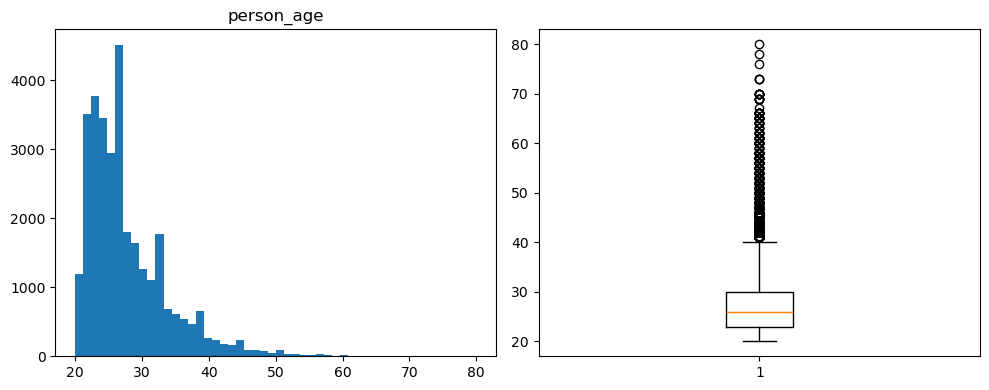

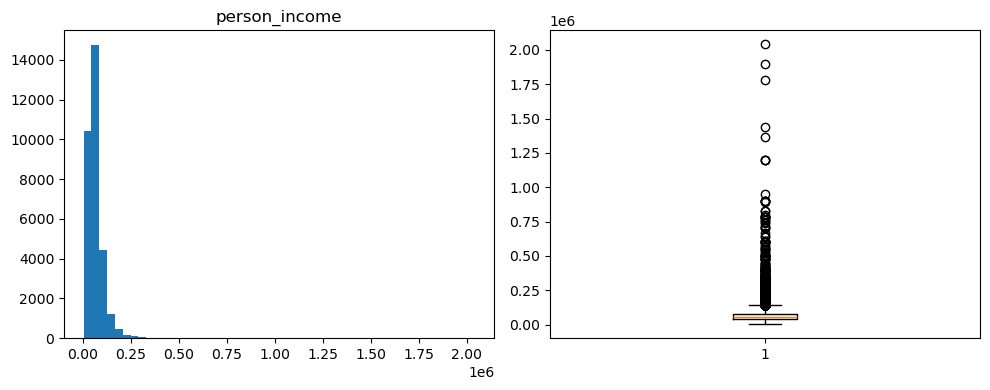

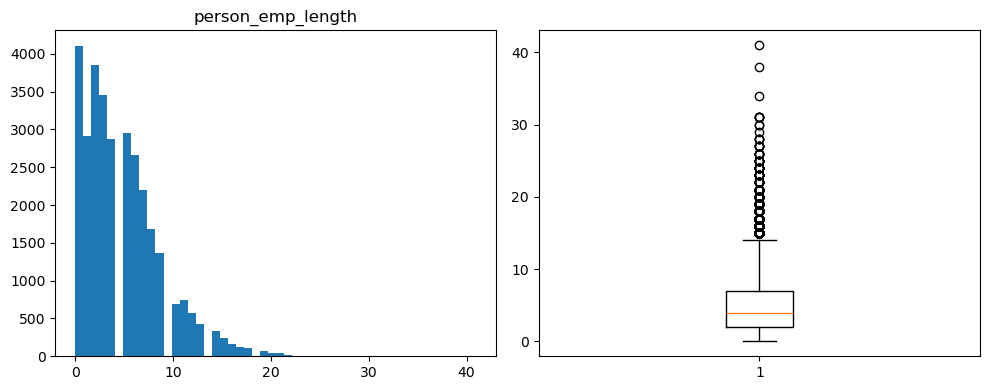

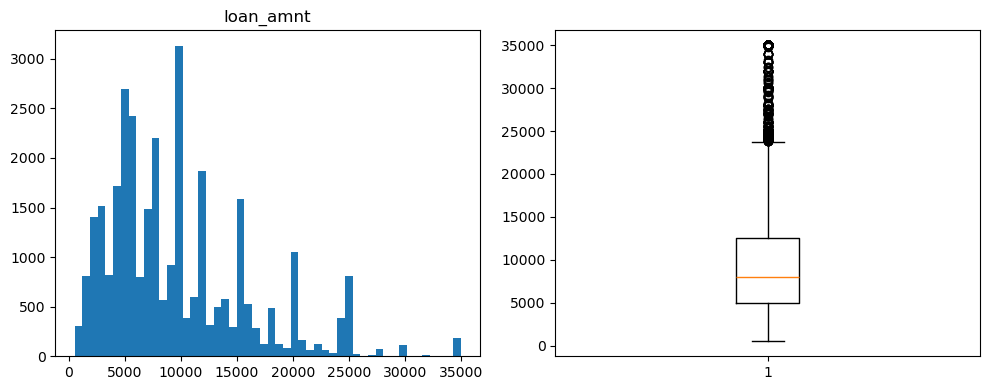

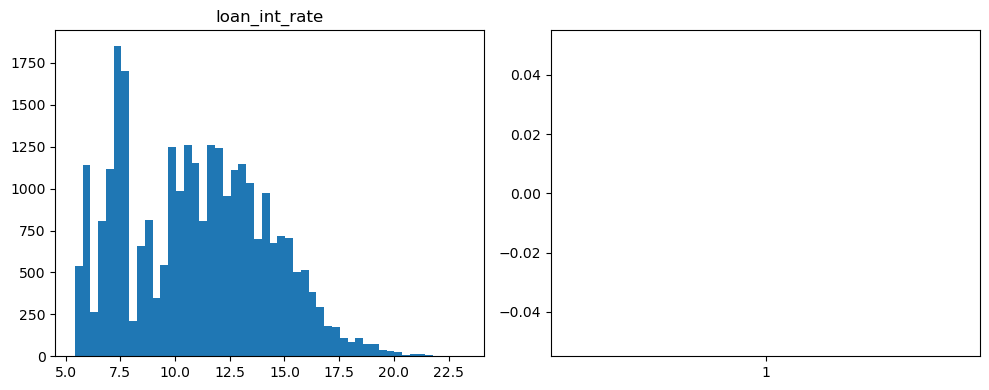

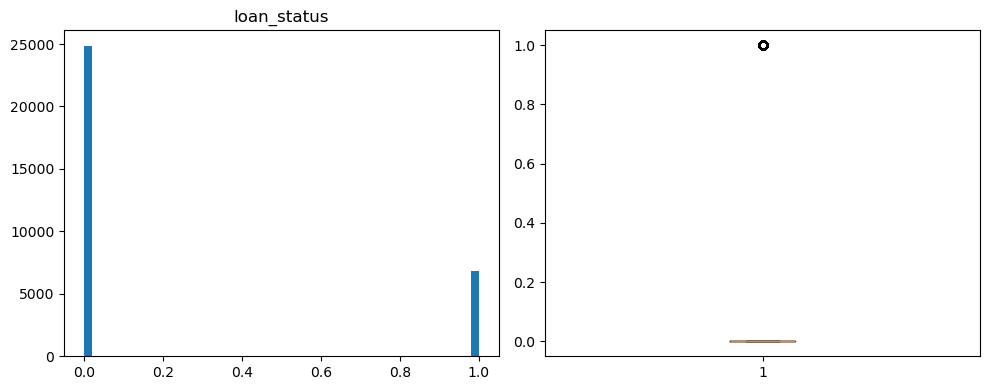

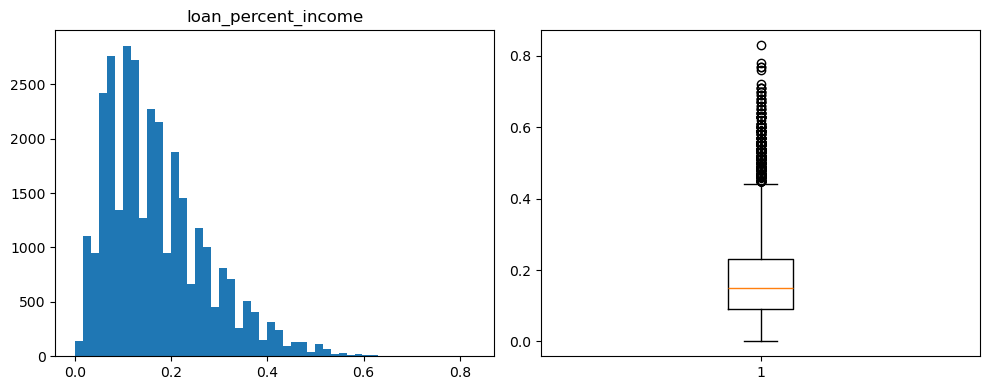

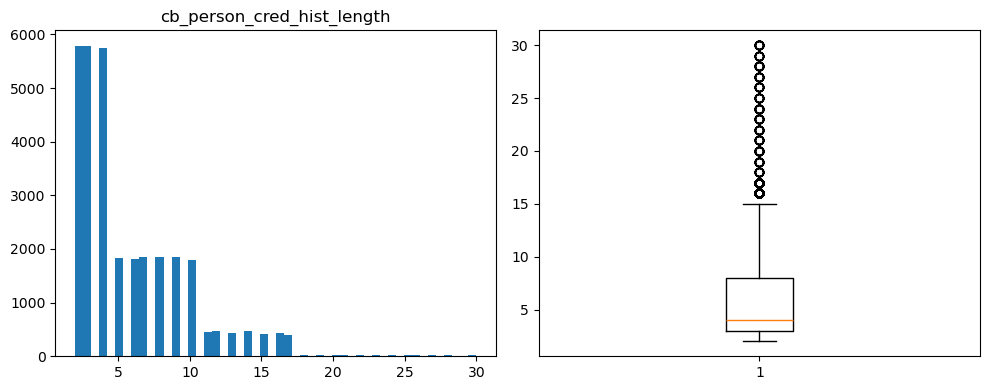

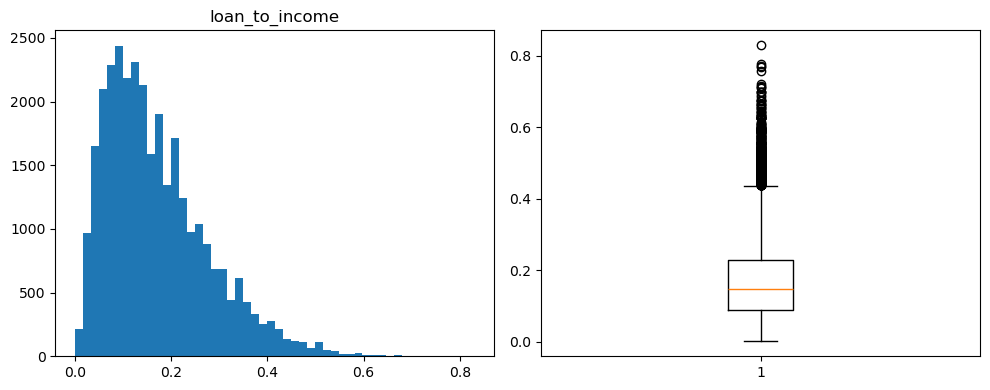

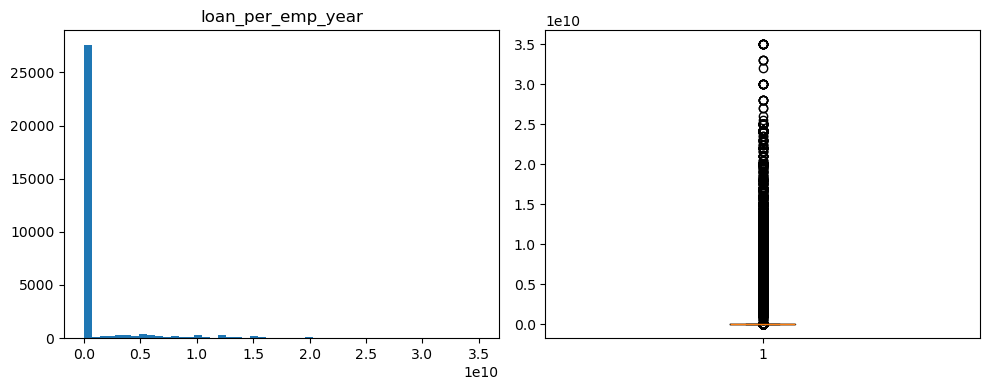

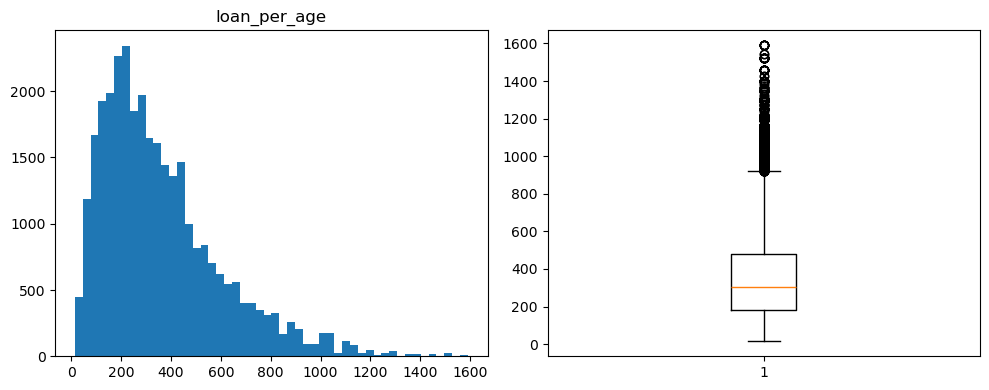

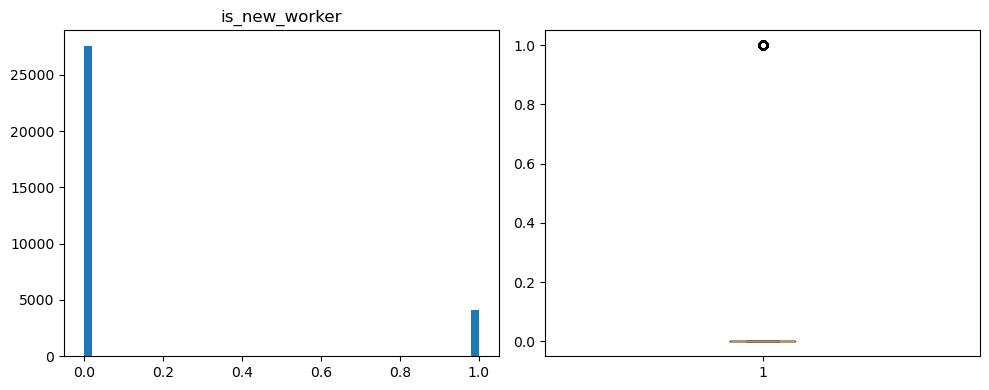

In [85]:
# uni-variate analysis
num_columns = df.select_dtypes(include="number").columns
for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].hist(df[col], bins=50)
    axes[1].boxplot(df[col], vert=True)
    axes[0].set_title(col)
    plt.tight_layout()
    plt.show()


person_home_ownership


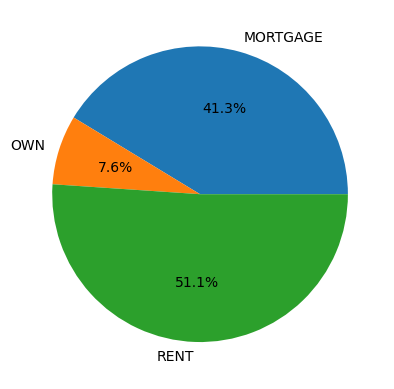

loan_intent


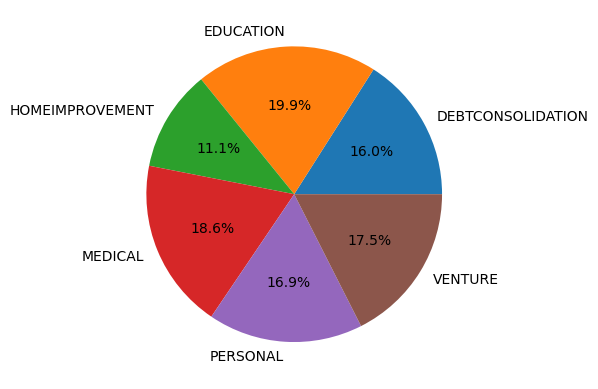

loan_grade


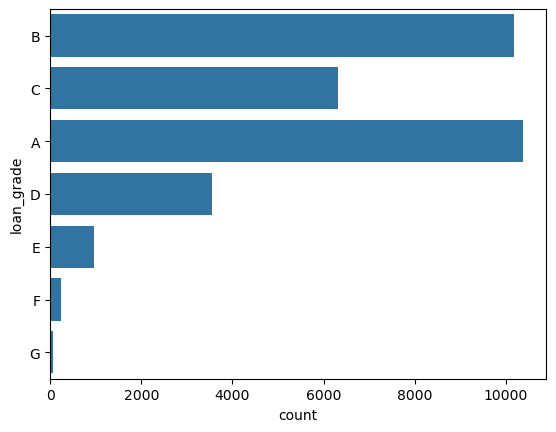

cb_person_default_on_file


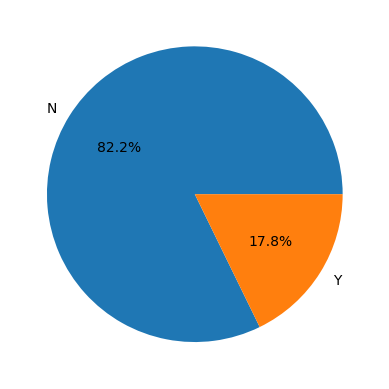

In [87]:
cat_columns = df.select_dtypes(include="O").columns
for col in cat_columns:
    print(col)
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['person_income']].count().rename(columns={'person_income':'count'})
        plt.pie(labels=dff.index, x=dff['count'], autopct="%1.1f%%")
    elif df[col].nunique() < 10:
        sns.countplot(y=df[col])
    else:
        dff = df.groupby(col)[['person_income']].count().reset_index().sort_values(by='person_income', ascending=False).head(10).rename(columns={'person_income':'count'})
        sns.barplot(y=dff[col], x=dff['count'])
    plt.show()

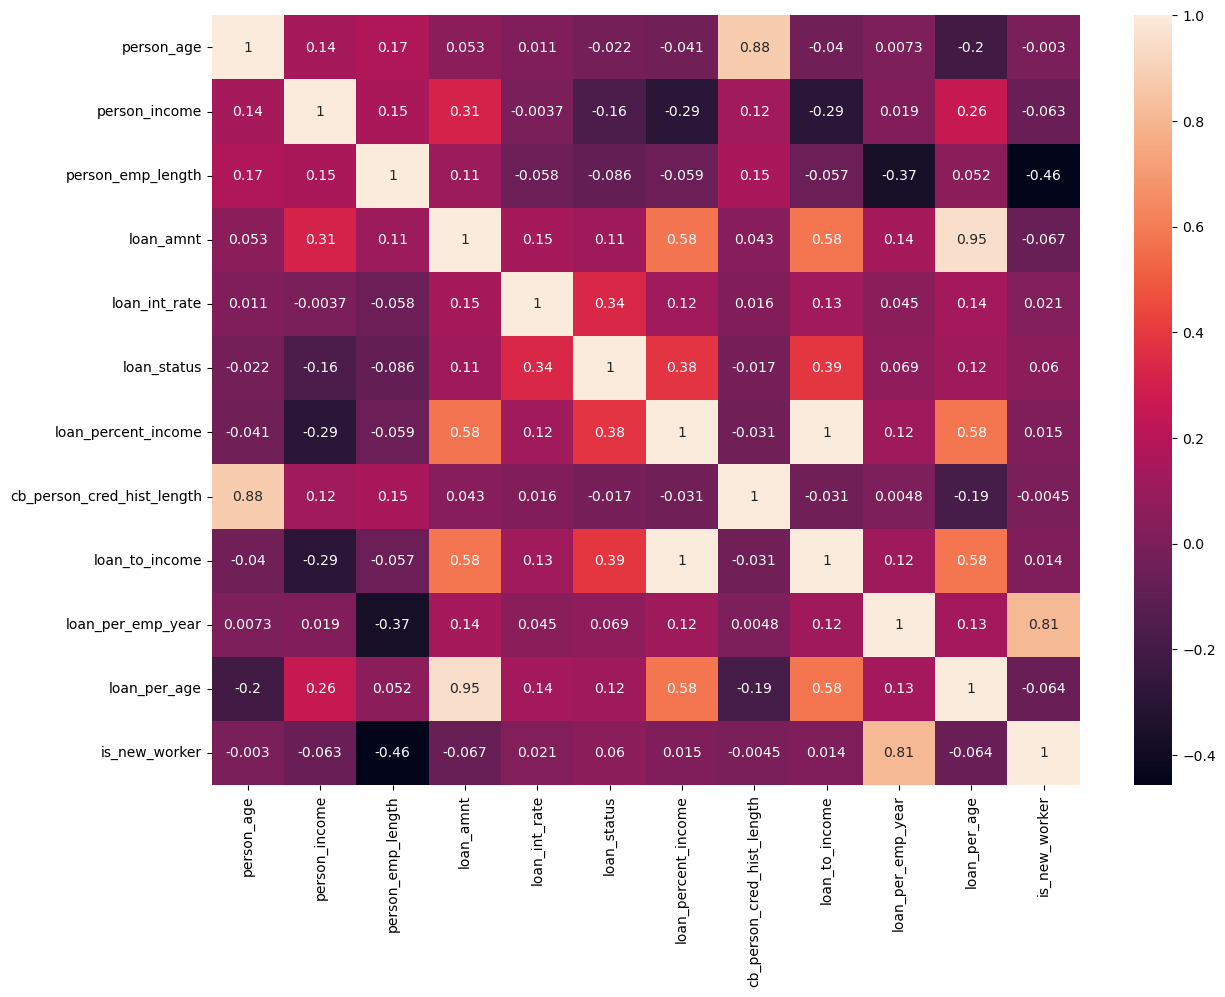

In [89]:
### bi-variate
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)
plt.show()

In [146]:
grade_default = ( df.groupby('loan_grade')['loan_status'].mean() .sort_index())
grade_default


loan_grade
A    0.095573
B    0.159285
C    0.203071
D    0.587623
E    0.641807
F    0.703390
G    0.984375
Name: loan_status, dtype: float64

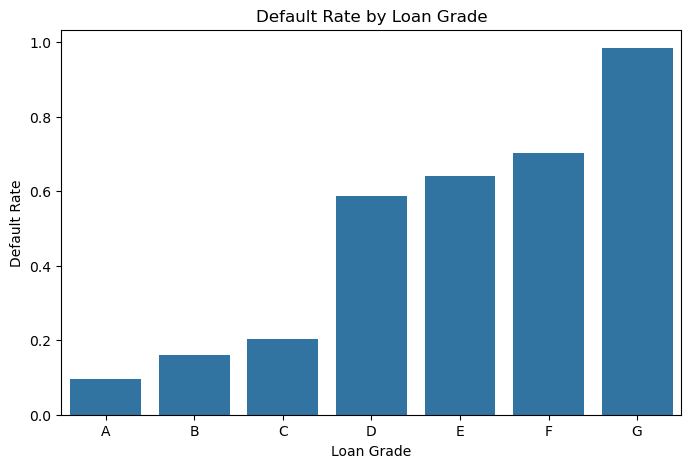

In [147]:
#Does loan grade correspond to higher default risk?
grade_default = (
    df.groupby('loan_grade')['loan_status'].mean().reindex(['A','B','C','D','E','F','G']))

plt.figure(figsize=(8, 5))
sns.barplot(x=grade_default.index,y=grade_default.values)
plt.ylabel("Default Rate")
plt.xlabel("Loan Grade")
plt.title("Default Rate by Loan Grade")
plt.show()


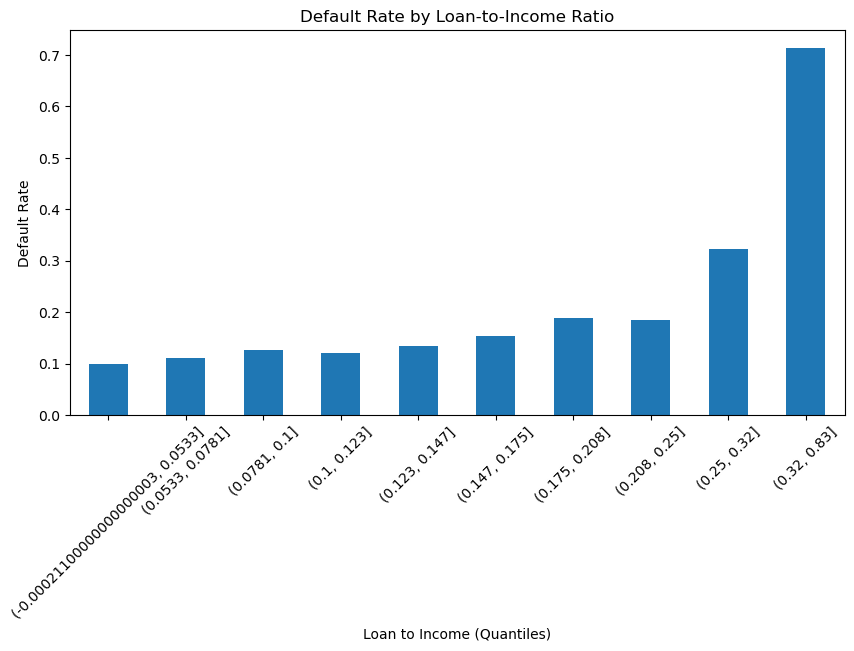

In [148]:
#how does loan size relative to income affect default risk?
df['loan_to_income_bin'] = pd.qcut(df['loan_to_income'], q=10)
loan_income_default = (df.groupby('loan_to_income_bin', observed=True)['loan_status'].mean())
plt.figure(figsize=(10, 5))
loan_income_default.plot(kind='bar')
plt.ylabel("Default Rate")
plt.xlabel("Loan to Income (Quantiles)")
plt.title("Default Rate by Loan-to-Income Ratio")
plt.xticks(rotation=45)
plt.show()


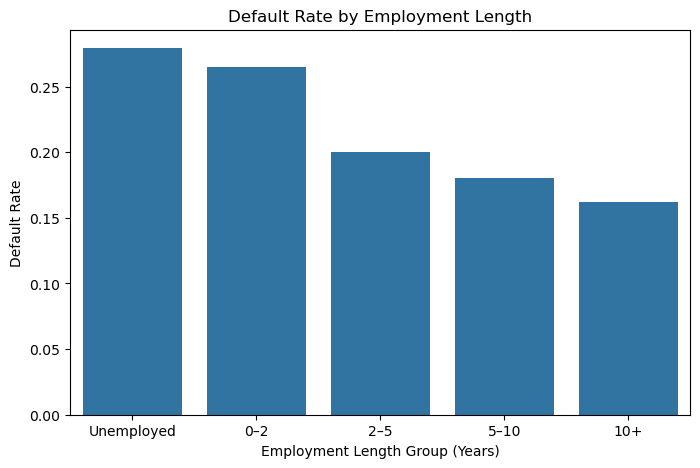

In [149]:
#Does employment length reduce default risk?
df['emp_length_group'] = pd.cut(df['person_emp_length'],bins=[-1, 0, 2, 5, 10, 100],labels=['Unemployed', '0–2', '2–5', '5–10', '10+'])
emp_default = ( df.groupby('emp_length_group',observed=True)['loan_status'].mean())
plt.figure(figsize=(8, 5))
sns.barplot( x=emp_default.index, y=emp_default.values)
plt.ylabel("Default Rate")
plt.xlabel("Employment Length Group (Years)")
plt.title("Default Rate by Employment Length")
plt.show()


In [29]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_to_income', 'loan_per_emp_year', 'loan_per_age', 'is_new_worker'],
      dtype='object')

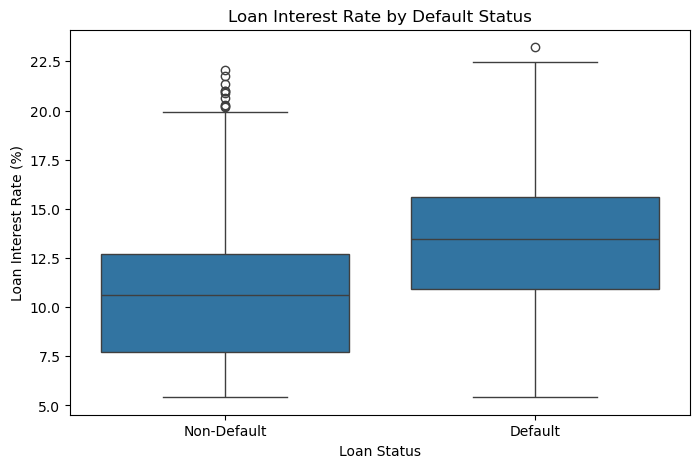

In [39]:
#Does higher loan interest rate correlate with riskier borrowers?
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.xticks([0,1], ['Non-Default', 'Default'])
plt.ylabel("Loan Interest Rate (%)")
plt.xlabel("Loan Status")
plt.title("Loan Interest Rate by Default Status")
plt.show()


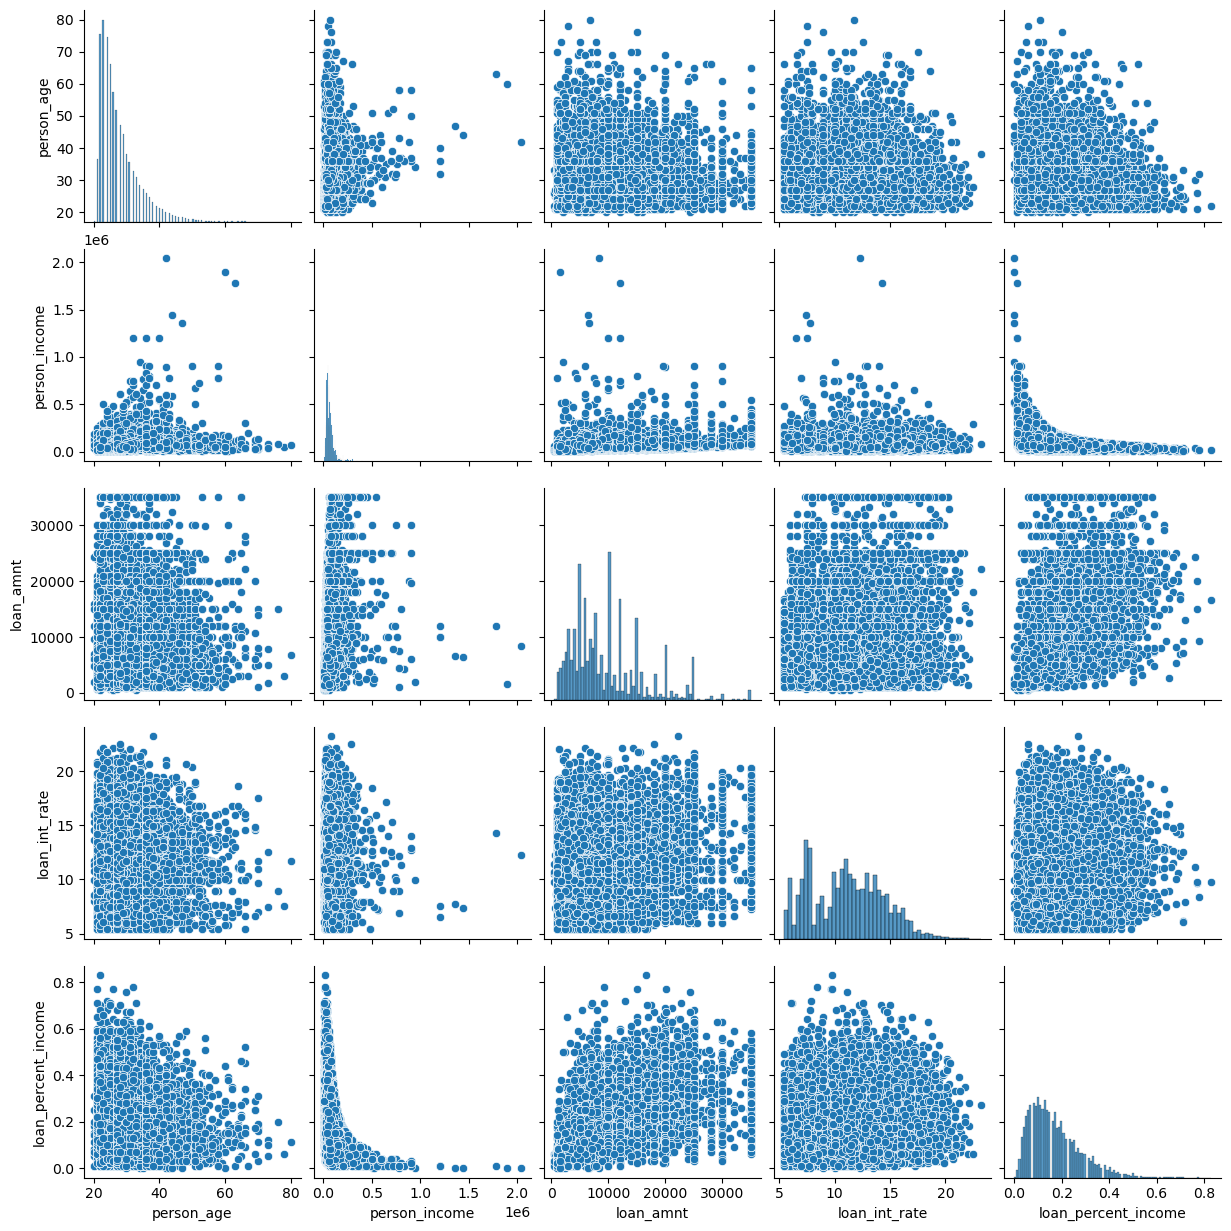

In [40]:
cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
sns.pairplot(df[cols])
plt.show()


### 3) Pre-Processing

In [29]:
# * a) Detect & Handle Duplicates
df.duplicated().sum()

np.int64(157)

In [164]:
df.drop_duplicates(inplace=True)

In [165]:
df.duplicated().sum()

np.int64(0)

In [166]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_to_income', 'loan_per_emp_year', 'loan_per_age', 'is_new_worker'],
      dtype='object')

In [167]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N': 0, 'Y': 1})


In [168]:
df['cb_person_default_on_file']

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
32575   NaN
32577   NaN
32578   NaN
32579   NaN
32580   NaN
Name: cb_person_default_on_file, Length: 31489, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25191, 15), (6298, 15), (25191,), (6298,))

In [170]:
X_train.isna().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                  2415
loan_percent_income               0
cb_person_default_on_file     25191
cb_person_cred_hist_length        0
loan_to_income                    0
loan_per_emp_year                 0
loan_per_age                      0
is_new_worker                     0
dtype: int64

In [171]:
X_train[X_train['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_per_emp_year,loan_per_age,is_new_worker
27432,27,140000,MORTGAGE,11.0,MEDICAL,A,2700,NaN,0.02,NaN,9,0.019286,245.454523,99.999996,0
6909,23,50004,MORTGAGE,7.0,PERSONAL,A,6000,NaN,0.12,NaN,3,0.119990,857.142735,260.869554,0
16263,22,130000,MORTGAGE,3.0,DEBTCONSOLIDATION,C,14500,NaN,0.11,NaN,2,0.111538,4833.331722,659.090879,0
21150,29,70000,RENT,4.0,EDUCATION,E,5000,NaN,0.07,NaN,6,0.071429,1249.999688,172.413787,0
23395,27,93000,RENT,1.0,MEDICAL,A,8000,NaN,0.09,NaN,7,0.086022,7999.992000,296.296285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,25,37000,RENT,1.0,DEBTCONSOLIDATION,F,4200,NaN,0.11,NaN,2,0.113514,4199.995800,167.999993,0
13276,21,90000,MORTGAGE,5.0,PERSONAL,B,21000,NaN,0.23,NaN,4,0.233333,4199.999160,999.999952,0
14539,23,39996,RENT,7.0,PERSONAL,B,2000,NaN,0.05,NaN,2,0.050005,285.714245,86.956518,0
25373,28,62000,RENT,2.0,EDUCATION,C,12000,NaN,0.19,NaN,10,0.193548,5999.997000,428.571413,0


In [172]:
X_test[X_test['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_per_emp_year,loan_per_age,is_new_worker
24101,30,70000,MORTGAGE,6.0,HOMEIMPROVEMENT,B,12800,NaN,0.18,NaN,7,0.182857,2.133333e+03,426.666652,0
30266,37,50000,MORTGAGE,6.0,MEDICAL,B,16000,NaN,0.32,NaN,12,0.320000,2.666666e+03,432.432421,0
10043,22,66800,RENT,2.0,DEBTCONSOLIDATION,A,9300,NaN,0.14,NaN,3,0.139222,4.649998e+03,422.727254,0
10100,22,59000,RENT,1.0,DEBTCONSOLIDATION,D,15000,NaN,0.25,NaN,2,0.254237,1.499999e+04,681.818151,0
30930,39,70000,OWN,0.0,VENTURE,A,8000,NaN,0.11,NaN,12,0.114286,8.000000e+09,205.128200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20734,28,36000,MORTGAGE,5.0,MEDICAL,E,15450,NaN,0.43,NaN,8,0.429167,3.089999e+03,551.785695,0
2024,22,41000,RENT,5.0,VENTURE,A,14000,NaN,0.34,NaN,3,0.341463,2.799999e+03,636.363607,0
30417,39,32400,RENT,3.0,MEDICAL,B,7000,NaN,0.22,NaN,16,0.216049,2.333333e+03,179.487175,0
31171,42,62900,MORTGAGE,26.0,MEDICAL,C,3000,NaN,0.04,NaN,14,0.047695,1.153846e+02,71.428570,0


In [173]:
X_train['loan_int_rate'].isnull().mean() * 100


np.float64(9.586757175181612)

In [174]:
X_test['loan_int_rate'].isnull().mean() * 100


np.float64(9.637980311209908)

In [175]:
median_imputer = SimpleImputer(strategy='median')
X_train['loan_int_rate']=median_imputer.fit_transform(X_train[['loan_int_rate']])
X_test['loan_int_rate']=median_imputer.transform(X_test[['loan_int_rate']])

In [176]:
X_train['loan_int_rate'].isna().sum()

np.int64(0)

In [177]:
X_test['loan_int_rate'].isna().sum()

np.int64(0)

In [178]:
X_train.select_dtypes(include='number')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_per_emp_year,loan_per_age,is_new_worker
5151,25,44000,5.0,4000,5.79,0.09,NaN,4,0.090909,7.999998e+02,159.999994,0
31010,42,55000,1.0,10000,13.79,0.18,NaN,13,0.181818,9.999990e+03,238.095232,0
9847,23,39600,7.0,9000,11.99,0.23,NaN,3,0.227273,1.285714e+03,391.304331,0
27432,27,140000,11.0,2700,10.99,0.02,NaN,9,0.019286,2.454545e+02,99.999996,0
6799,21,25000,1.0,7000,12.69,0.28,NaN,2,0.280000,6.999993e+03,333.333317,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11177,24,72000,8.0,18000,11.86,0.25,NaN,4,0.250000,2.250000e+03,749.999969,0
7429,21,28000,2.0,6625,13.06,0.24,NaN,2,0.236607,3.312498e+03,315.476175,0
687,23,65000,0.0,20000,10.65,0.31,NaN,3,0.307692,2.000000e+10,869.565180,1
8519,24,40000,1.0,7800,10.99,0.20,NaN,2,0.195000,7.799992e+03,324.999986,0


In [179]:
X_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_to_income', 'loan_per_emp_year',
       'loan_per_age', 'is_new_worker'],
      dtype='object')

In [180]:
robust_numeric = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'loan_to_income', 'loan_per_emp_year', 'loan_per_age']
ohe_cols = [
    'person_home_ownership',
    'loan_intent', ]          
ordinal_cols = [
    'loan_grade',]

binary_cols = [
    'is_new_worker', 
    'cb_person_default_on_file']





In [181]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
    
    ))
])


In [182]:
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, robust_numeric),
    ('bin', binary_pipeline, binary_cols),
    ('ohe', ohe_pipeline, ohe_cols),
    ('ord', ordinal_pipeline, ordinal_cols)])


In [183]:
preprocessing_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length',
                                  'loan_to_income', 'loan_per_emp_year',
                                  'loan_per_age']),
                                ('bin',
                                 Pipeline(steps=[('imputer',
                                                  Simpl...quent'))]),
                                 ['is_new_worker',
                                  'cb_person_default_on_file']),
                                ('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['person_home_ownership', 'loan_intent']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['loan_grade'])])

In [184]:
X_train_preprocessed= preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed=preprocessing_pipeline.transform(X_test)

c:\Users\MichaelM\.conda\envs\analysis\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['cb_person_default_on_file']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\MichaelM\.conda\envs\analysis\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['cb_person_default_on_file']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [185]:
pd.DataFrame(X_train_preprocessed).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,2.519100e+04,25191.000000,...,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,0.242303,0.251791,0.151157,0.224613,0.011029,0.138987,0.357429,0.160978,2.622990e+05,0.200725,...,0.412171,0.076535,0.511294,0.160653,0.196618,0.111468,0.187369,0.168711,0.175182,1.229328
std,0.882372,1.243915,0.801350,0.866542,0.658023,0.758254,0.808353,0.765034,8.370951e+05,0.822193,...,0.492235,0.265858,0.499882,0.367218,0.397449,0.314718,0.390215,0.374504,0.380130,1.170875
min,-0.857143,-1.268293,-0.800000,-1.027397,-1.192719,-1.071429,-0.400000,-1.050492,-5.041853e-01,-0.970588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.428571,-0.414634,-0.400000,-0.410959,-0.535332,-0.428571,-0.200000,-0.420837,-2.675781e-01,-0.401471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.571429,0.585366,0.600000,0.589041,0.464668,0.571429,0.800000,0.579163,7.324219e-01,0.598529,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,7.714286,42.097561,7.400000,3.698630,2.618844,4.857143,5.200000,4.905737,8.203128e+06,4.385294,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


#### modeling

In [186]:
#simple model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1.0,tol=0.0001,max_iter=1000,random_state=42,class_weight='balanced',n_jobs=-1)
log_reg

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

In [187]:
log_reg.fit(X_train_preprocessed, y_train)
y_train_pred = log_reg.predict(X_train_preprocessed) 

In [188]:
# performance
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_valid_pred = cross_val_predict(log_reg, X_train_preprocessed, y_train, cv=5, method='predict')
print(f"Train accuracy: {log_reg.score(X_train_preprocessed, y_train)}")
print(f"Validation accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train accuracy: 0.7890119487118415
Validation accuracy: 0.7836925886229209


In [189]:
from sklearn.metrics import roc_auc_score

y_prob = cross_val_predict(log_reg, X_train_preprocessed, y_train, cv=5, method="predict_proba")[:, 1]
roc_auc_score(y_train, y_prob)


np.float64(0.8631680326820041)

In [190]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
    
    ))
])


In [191]:
from sklearn.compose import ColumnTransformer

preprocessing_dt_pipeline = ColumnTransformer([
    ('num', num_pipeline, robust_numeric),
    ('bin', binary_pipeline, binary_cols),
    ('ohe', ohe_pipeline, ohe_cols),
    ('ord', ordinal_pipeline, ordinal_cols)])


In [192]:
X_train_preprocessed_dt= preprocessing_dt_pipeline.fit_transform(X_train)
X_test_preprocessed_dt=preprocessing_dt_pipeline.transform(X_test)

c:\Users\MichaelM\.conda\envs\analysis\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['cb_person_default_on_file']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\MichaelM\.conda\envs\analysis\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['cb_person_default_on_file']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [220]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(scale_pos_weight)

xgb_clf = XGBClassifier(objective='binary:logistic',eval_metric='logloss', random_state=42,scale_pos_weight=scale_pos_weight)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_clf,param_grid=param_grid,scoring='roc_auc',cv=5,verbose=2,n_jobs=-1)
grid_search.fit(X_train_preprocessed_dt, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV roc_auc:", grid_search.best_score_)




3.629847454512038
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1.0}
Best CV roc_auc: 0.9493367575436213


In [226]:
best_xgb = grid_search.best_estimator_

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score

# 5-fold cross-validation (on the training data)
cv_scores = cross_val_score(best_xgb, X_train_preprocessed_dt, y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())

cv_scores = cross_val_score(best_xgb, X_train_preprocessed_dt, y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


Cross-validated ROC AUC scores: [0.94095036 0.94861225 0.95735829 0.9516109  0.94815199]
Mean CV ROC AUC: 0.9493367575436213
Cross-validated ROC AUC scores: [0.94095036 0.94861225 0.95735829 0.9516109  0.94815199]
Mean CV ROC AUC: 0.9493367575436213


In [227]:
y_train_pred_cv = cross_val_predict(best_xgb, X_train_preprocessed_dt, y_train, cv=5, method='predict')
y_train_proba_cv = cross_val_predict(best_xgb, X_train_preprocessed_dt, y_train, cv=5, method='predict_proba')[:, 1]
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_pred_cv))
print(classification_report(y_train, y_train_pred_cv))

# ROC AUC
roc_auc = roc_auc_score(y_train, y_train_proba_cv)
print("Cross-validated ROC AUC:", roc_auc)


[[19021   729]
 [ 1111  4330]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19750
           1       0.86      0.80      0.82      5441

    accuracy                           0.93     25191
   macro avg       0.90      0.88      0.89     25191
weighted avg       0.93      0.93      0.93     25191

Cross-validated ROC AUC: 0.9492066052638313


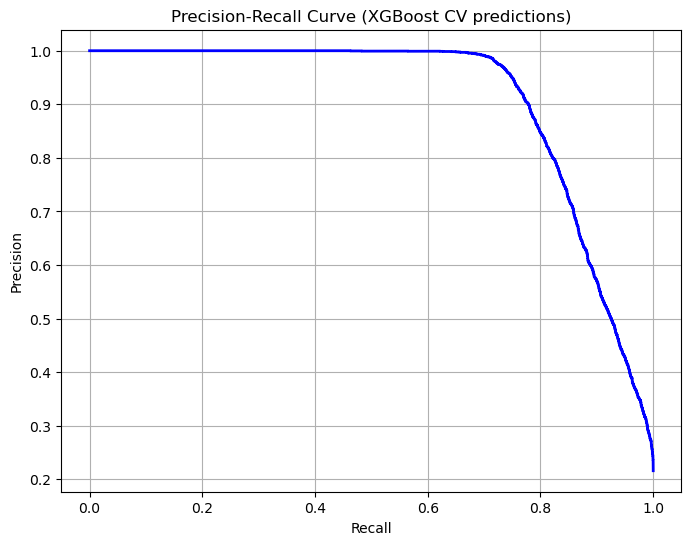

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_train_proba = cross_val_predict(
    best_xgb,
    X_train_preprocessed_dt,
    y_train,
    cv=5,
    method='predict_proba'
)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost CV predictions)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

target_recall = 0.83
idx = np.where(recall >= target_recall)[0][-1]  
selected_threshold = thresholds[idx - 1]  

print(f"Selected threshold for recall ~ {target_recall}: {selected_threshold:.4f}")
print(f"Actual recall at this threshold: {recall[idx]:.3f}")
print(f"Precision at this threshold: {precision[idx]:.3f}")

y_train_pred_recall = (y_train_proba >= selected_threshold).astype(int)

cm = confusion_matrix(y_train, y_train_pred_recall)
print(cm)
print(classification_report(y_train, y_train_pred_recall))


Selected threshold for recall ~ 0.83: 0.4092
Actual recall at this threshold: 0.830
Precision at this threshold: 0.783
[[18496  1254]
 [  924  4517]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     19750
           1       0.78      0.83      0.81      5441

    accuracy                           0.91     25191
   macro avg       0.87      0.88      0.88     25191
weighted avg       0.92      0.91      0.91     25191



In [ ]:
y_test_proba = best_xgb.predict_proba(X_test_preprocessed_dt)[:, 1]


In [222]:
y_test_pred = best_xgb.predict(X_test_preprocessed_dt)


In [223]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

print(classification_report(y_test, y_test_pred))


[[4755  183]
 [ 274 1086]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4938
           1       0.86      0.80      0.83      1360

    accuracy                           0.93      6298
   macro avg       0.90      0.88      0.89      6298
weighted avg       0.93      0.93      0.93      6298



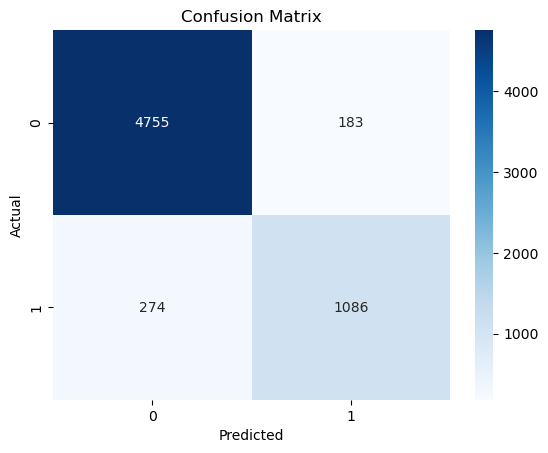

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [225]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_test_proba)
print("Test ROC-AUC:", roc_auc)


Test ROC-AUC: 0.9485794439282396


In [139]:
from sklearn.metrics import precision_recall_curve

y_test_proba = best_xgb.predict_proba(X_test_preprocessed_dt)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)


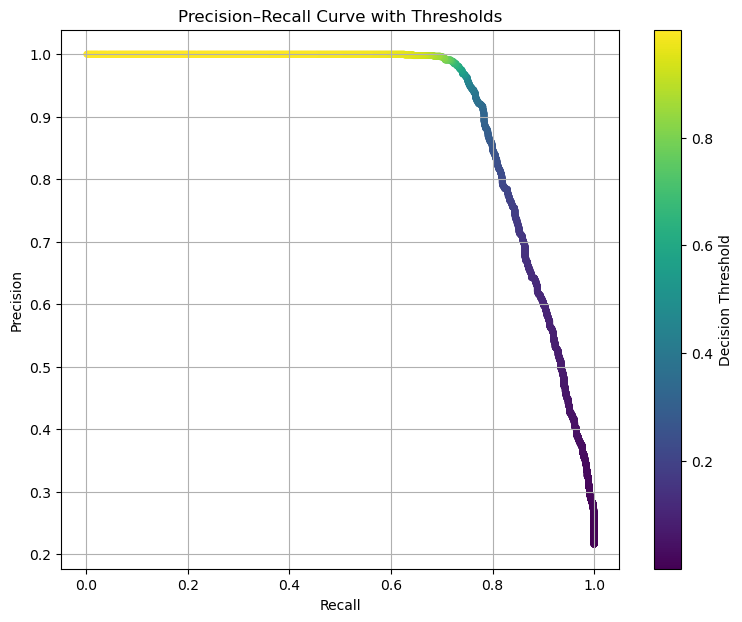

In [140]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 7))

sc = plt.scatter(
    recall[:-1],
    precision[:-1],
    c=thresholds,
    cmap='viridis',
    s=15
)

plt.colorbar(sc, label='Decision Threshold')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve with Thresholds')
plt.grid(True)
plt.show()


In [141]:
target_recall = 0.85

idx = np.where(recall >= target_recall)[0][-1]
selected_threshold = thresholds[idx - 1]

print(f"Selected threshold: {selected_threshold:.4f}")
print(f"Recall: {recall[idx]:.3f}")
print(f"Precision: {precision[idx]:.3f}")


Selected threshold: 0.1670
Recall: 0.850
Precision: 0.729


In [142]:
y_test_pred_recall_priority = (y_test_proba >= selected_threshold).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred_new = (y_test_proba >= selected_threshold).astype(int)

cm_new = confusion_matrix(y_test, y_test_pred_new)
print(cm_new)

print(classification_report(y_test, y_test_pred_new))


[[4512  431]
 [ 204 1157]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      4943
           1       0.73      0.85      0.78      1361

    accuracy                           0.90      6304
   macro avg       0.84      0.88      0.86      6304
weighted avg       0.91      0.90      0.90      6304



In [233]:
import joblib

joblib.dump(best_xgb, "xgb_model.pkl")
joblib.dump(selected_threshold, "decision_threshold.pkl")


['decision_threshold.pkl']

In [239]:
joblib.dump(preprocessing_dt_pipeline, "preprocessor.pkl")


['preprocessor.pkl']